# Fashion MNIST Classification with Artificial Neural Networks (ANNs)

# ABOUT THE DATASET
The Fashion MNIST( Modified National Institute of Standards and Technology) dataset is a popular benchmark dataset often used to evaluate machine learning models in image classification tasks. Here's a detailed description of the dataset:

**1. Overview**
Fashion MNIST was created as a more challenging alternative to the MNIST digit dataset.
It consists of 70,000 grayscale images of 10 different classes of clothing items.
Each image is 28x28 pixels, and the dataset has a similar structure to MNIST, making it easy to use for testing and comparison.

**2. Classes and Labels**
There are 10 classes in total, each representing a different type of fashion item. Each class is labeled with an integer from 0 to 9 and has an associated textual label:

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

**3. Dataset Split**
The dataset is split into:

- **60,000 training images:** Used for training machine learning models.
- **10,000 test images:** Used for evaluating model performance on unseen data.

**4. Image Characteristics**
**Each image in the dataset:**
- Is a 28x28 pixel grayscale image (one color channel).
- Contains a single clothing item centered in the image.
- Has pixel values ranging from 0 to 255 (0 for black, 255 for white).
- Images are generally low-resolution, making the classification task challenging, especially for items with subtle visual differences (e.g., Shirt vs. T-shirt/top).

**5. Why Fashion MNIST?**
- __Improves upon MNIST:__ Fashion MNIST is often used as a more difficult alternative to MNIST digits, as it requires the model to capture more complex patterns to distinguish between clothing items.
  
- __Benchmark for Model Testing:__ Due to its simplicity and similarity to MNIST, Fashion MNIST has become a standard dataset for testing image classification models and comparing different algorithms.

**6. Usage**

The dataset is available in many machine learning libraries, such as Keras, making it easy to load and use for experimentation.
It's often used for tasks such as image classification, testing neural network architectures, and comparing model performances.

**7. Sample Class Distribution**

The classes are balanced, with each class containing roughly the same number of samples, so there’s no need for additional techniques to handle class imbalance.

Fashion MNIST serves as a great introduction to image classification, while also offering more complexity than MNIST digits, pushing models to learn nuanced differences between classes.

### Objective
- To build an Artificial Neural Network (ANN) model using the Fashion MNIST dataset.
- Preprocess the data, create visualizations, compile and evaluate the model on both training and validation sets.
- Use the trained model to predict on the test set and display some results.


# Step 1: Import Libraries

In [1]:

# Import libraries required for loading the dataset, building the neural network model, 
# and creating visualizations for data exploration and model performance.

import numpy as np  # For handling numerical operations and array manipulations
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns  # For statistical data visualization, particularly for class distribution

from tensorflow.keras.datasets import fashion_mnist  # To load the Fashion MNIST dataset
from tensorflow.keras.models import Sequential  # To build a sequential (layer-by-layer) neural network model
from tensorflow.keras.layers import Dense  # Fully connected neural network layer used in ANN
from tensorflow.keras.optimizers import Adam  # Optimizer for training the neural network
from sklearn.metrics import classification_report


### Step 2: Loading the Fashion MNIST Dataset
- Loading the Fashion MNIST dataset directly from Keras and explore its structure.
- Splitting the data into training and test sets.


In [3]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Print the shape of the training and test data
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)


These shapes give insight into the structure of the MNIST dataset:

**1. Training Data Shape:** (60000, 28, 28)

There are 60,000 training images in the dataset.
Each image has dimensions 28x28 pixels, so each image is a 2D array with 784 (28*28) pixel values in grayscale.

**2. Test Data Shape:**(10000, 28, 28)

There are 10,000 test images in the dataset, with each image also having 28x28 pixels.

**3. Training Labels Shape:** (60000,)

There are 60,000 labels in the training set, corresponding to the 60,000 training images.
Each label is a single integer representing the digit (0-9) that the corresponding image represents.

**4. Test Labels Shape:** (10000,)

There are 10,000 labels in the test set, corresponding to the 10,000 test images.

**The cell above loads the Fashion MNIST dataset, which is split into training and test sets. Printing the shapes allows us to verify that the data has been loaded correctly and understand the dimensions for later preprocessing steps.**

### Step 3: Data Preprocessing
- Scale pixel values to the range [0, 1] by dividing by 255.
- Reshape each 28x28 image into a 784-length vector to use in our ANN.


In [5]:
# Scale pixel values to [0, 1] range
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape each image to a 784-dimensional vector
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Verify new shapes after reshaping
print(f"Reshaped training data shape: {x_train.shape}")
print(f"Reshaped test data shape: {x_test.shape}")


Reshaped training data shape: (60000, 784)
Reshaped test data shape: (10000, 784)


- **Here, we scale the pixel values to a range of 0 to 1, which helps improve training stability for neural networks.**
- **Also, reshaping each 28x28 image into a flat 784-dimensional vector, which is required for the ANN input layer since ANNs expect 1D input vectors rather than 2D images.**



### Step 4: Data Visualization
- Display some sample images from the dataset along with their labels.
- Create a bar chart showing the distribution of samples across different classes.


### Displaying Sample Images

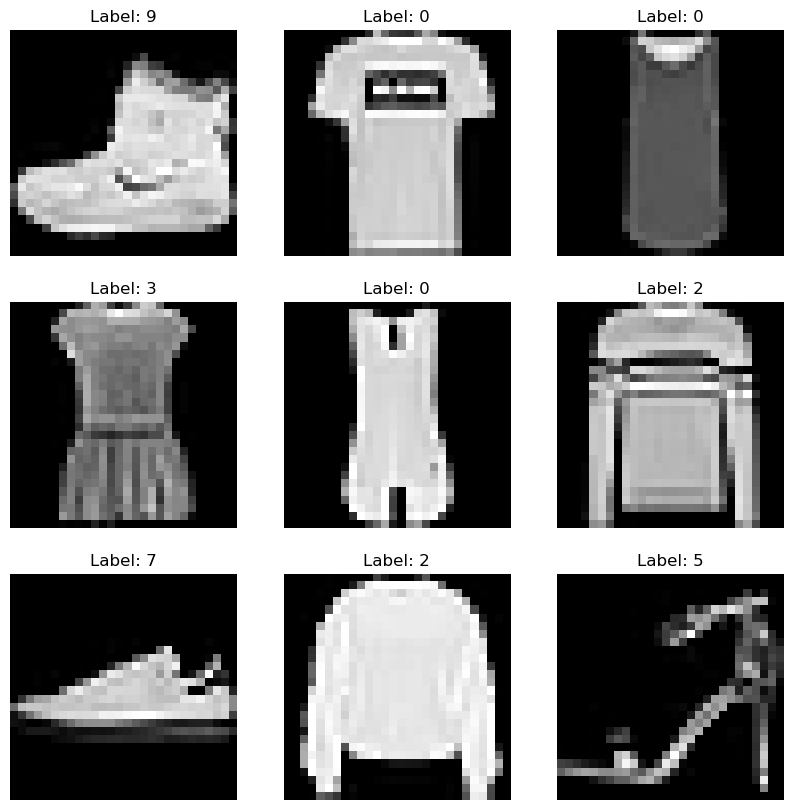

In [7]:
# Display sample images from the dataset

# Initialize a figure with a specified size to display a 3x3 grid of sample images
plt.figure(figsize=(10, 10))

# Loop through the first 9 images in the training dataset
for i in range(9):
    # Create a subplot in a 3x3 grid for each image
    plt.subplot(3, 3, i + 1)
    
    # Display the image, reshaping each 784-dimensional vector to a 28x28 2D array
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    
    # Set the title for each image to display its corresponding label
    plt.title(f"Label: {y_train[i]}")
    
    # Remove the axis labels for a cleaner presentation
    plt.axis('off')

# Render the figure with the 3x3 grid of sample images
plt.show()


**This cell displays sample images from the dataset with their labels. Visualizing some examples helps us better understand the data and confirm that the images and labels are correctly loaded and preprocessed.**

- **Thus, it is seen that all the labels are correct corresponding to the fashion item**
- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

### Distribution of Classes (Bar Chart)

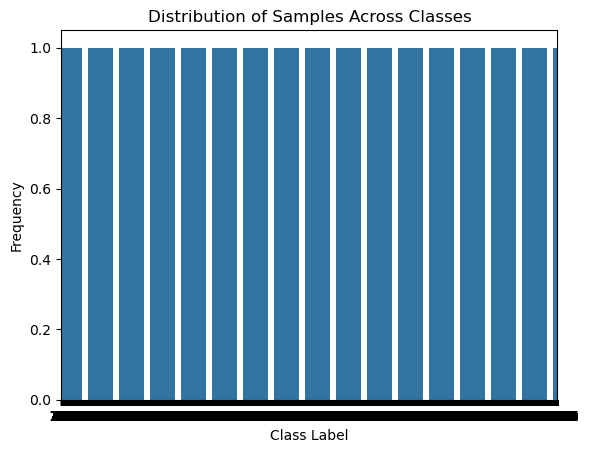

In [9]:

# Plot the distribution of samples across different classes

# Create a count plot for the training labels to show the number of samples in each class
sns.countplot(y_train)

# Set the title of the plot to describe its content
plt.title("Distribution of Samples Across Classes")

# Label the x-axis to indicate it represents the class labels
plt.xlabel("Class Label")

# Label the y-axis to show it represents the frequency of samples per class
plt.ylabel("Frequency")

# Display the plot
plt.show()


- ***Visualizing the distribution of classes in the training dataset.***
- ***This helps in confirming that the dataset is balanced across classes, which is important for training a fair model without any bias toward specific classes.***

### Step 5: Building the Artificial Neural Network (ANN)
- Defining a Sequential model with two hidden layers.
- Using ReLU activation for hidden layers and softmax for the output layer (for multi-class classification).


In [9]:
# Define the architecture of the Artificial Neural Network (ANN) model

# Initialize a Sequential model
model = Sequential([
    # Input layer with 128 units and ReLU activation, expecting input shape of 784 (flattened 28x28 image)
    Dense(128, activation='relu', input_shape=(784,)),  
    
    # Hidden layer with 64 units and ReLU activation to capture complex patterns
    Dense(64, activation='relu'),  
    
    # Output layer with 10 units and softmax activation, representing the 10 classes in Fashion MNIST
    Dense(10, activation='softmax')  
])

C:\Users\taman\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- **Defining the ANN architecture.**
- **We use two hidden layers with ReLU activation functions, which allow the network to learn complex patterns, and a softmax output layer for multi-class classification across 10 classes.**



### Step 6: Compile the Model
- Compile the model using the Adam optimizer and sparse categorical cross-entropy as the loss function.
- Choose accuracy as the evaluation metric to monitor during training.


In [11]:
# Compile the model with an appropriate loss function, optimizer, and evaluation metrics

# Compile the model using the Adam optimizer for efficient gradient-based optimization
# Use sparse_categorical_crossentropy as the loss function, which is suitable for integer labels in multiclass classification
# Track accuracy as a metric to monitor model performance during training and evaluation
model.compile(optimizer=Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])



- **In the cell above, the model is being compiled ,the optimizer, loss function, and evaluation metric are specifies.**
- **We use the Adam optimizer for its efficiency and sparse_categorical_crossentropy as the loss function, which is suitable for multi-class classification where labels are integers.**


### Step 7: Train the Model
- Train the model on the training data for a specified number of epochs.
- Include validation data (20% of training data) to monitor the model’s performance during training.


In [13]:
# Train the model on the training data and store the training history for analysis

# Use an 80-20 split for training and validation to monitor performance on unseen data
# Set epochs to 10 for multiple training cycles to allow the model to learn patterns in the data
# Set batch_size to 32 to process 32 samples at a time, balancing computation efficiency and gradient stability
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7670 - loss: 0.6623 - val_accuracy: 0.8405 - val_loss: 0.4372
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8577 - loss: 0.3926 - val_accuracy: 0.8401 - val_loss: 0.4288
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8732 - loss: 0.3413 - val_accuracy: 0.8656 - val_loss: 0.3625
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8821 - loss: 0.3197 - val_accuracy: 0.8751 - val_loss: 0.3527
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8865 - loss: 0.2980 - val_accuracy: 0.8812 - val_loss: 0.3352
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8963 - loss: 0.2794 - val_accuracy: 0.8810 - val_loss: 0.3332
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8957 - loss: 0.2714 - val_accuracy: 0.8888 - val_loss: 0.3111
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9021 - loss: 0.2615 - 

- **Training the model on the training set for 10 epochs.**
- **We use a 20% validation split to monitor the model’s performance on unseen data during training, helping us detect overfitting or underfitting.**

### Step 8: Visualize Training and Validation Performance

- **Plotting training and validation accuracy and loss across epochs, to analyze the model's performance over time.** 
- **These plots help us see if the model is overfitting (where validation loss increases or diverges from training loss) or if it has stable learning.**



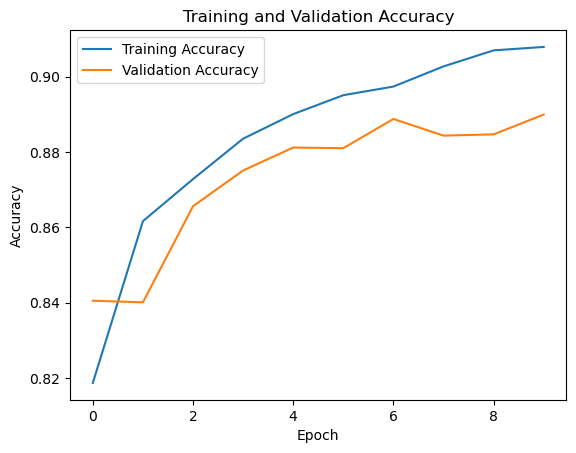

In [17]:
# Plot training and validation accuracy over epochs to visualize model performance

# Plot the training accuracy over each epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plot the validation accuracy over each epoch
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Label the x-axis to represent the number of training epochs
plt.xlabel('Epoch')

# Label the y-axis to represent accuracy values
plt.ylabel('Accuracy')

# Add a legend to distinguish between training and validation accuracy
plt.legend()

# Set the title of the plot to describe its contents
plt.title('Training and Validation Accuracy')

# Display the plot
plt.show()



### INSIGHTS:
**The "Training and Validation Accuracy" graph shows how well the model performs on both the training and validation datasets over multiple epochs. Here are some key insights based on the trends observed:**

**1. Accuracy Difference:**

- The training accuracy steadily increases, reaching above 90% by the end, indicating that the model is effectively learning the patterns in the training data.
- The validation accuracy, however, plateaus around 88% and shows more fluctuations than the training accuracy.

**2. Potential Overfitting:**

- Since the training accuracy continues to improve while the validation accuracy levels off and fluctuates, this could be a sign of overfitting.
- Overfitting occurs when the model learns specific patterns in the training data that don't generalize well to unseen data.
- This is common when the model becomes too complex or is trained for too many epochs, causing it to fit noise or specific details in the training set.

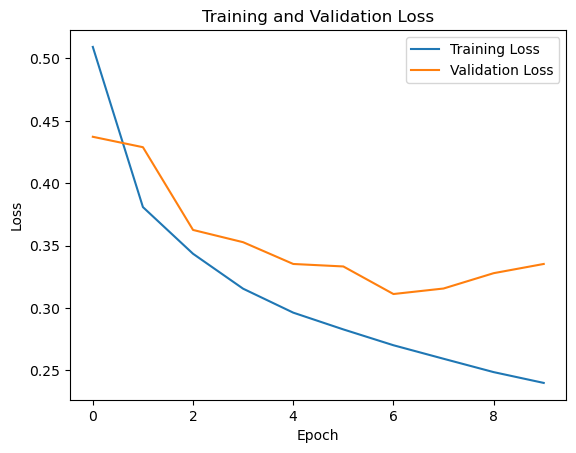

In [19]:
# Plot training and validation loss over epochs to assess how well the model fits the data

# Plot the training loss over each epoch
plt.plot(history.history['loss'], label='Training Loss')

# Plot the validation loss over each epoch
plt.plot(history.history['val_loss'], label='Validation Loss')

# Label the x-axis to represent the number of training epochs
plt.xlabel('Epoch')

# Label the y-axis to represent loss values
plt.ylabel('Loss')

# Add a legend to distinguish between training and validation loss
plt.legend()

# Set the title of the plot to describe its contents
plt.title('Training and Validation Loss')

# Display the plot
plt.show()


### INSIGHTS:

**The "Training and Validation Loss" graph provides the following insights:**

**1. Consistent Training Loss Decrease:** The training loss decreases steadily across epochs, indicating that the model is effectively learning from the training data.

**2. Validation Loss Fluctuations and Plateau:** The validation loss decreases initially but fluctuates and remains higher than the training loss. This suggests the model may be overfitting, as it performs better on the training data than on unseen validation data.

**3. Overfitting Indication:** The widening gap between training and validation loss highlights potential overfitting. This means the model might be learning specific patterns in the training data that don’t generalize well to new data.


### Step 9: Evaluate the Model on Test Set
- Evaluate the trained model on the test data to determine its performance on unseen data.


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Predict the classes for the test set
test_predictions = np.argmax(model.predict(x_test), axis=1)

# Calculate precision, recall, and F1-score
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

# Print the evaluation metrics
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1-Score: {test_f1}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8797 - loss: 0.3631
Test Accuracy: 0.8795999884605408
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Precision: 0.8793035449946157
Test Recall: 0.8796
Test F1-Score: 0.8787190792994058


# INSIGHTS WITH ANN ARCHITECTURE:
**Here’s what each of these metrics indicates about our model:**

- **Accuracy (87%):**
The model correctly predicts the category of a fashion item 87% of the time, which shows it can generally distinguish between different clothing types. However, it misses about 13% of items, possibly due to similarity between certain classes, like T-shirts and shirts.

- **Precision (87%):**
The model’s precision indicates it reliably predicts each class, with 87% of predictions being correct when the model assigns an item to a class. This helps avoid frequent false positives, meaning that items like "trousers" are rarely mistaken for other classes, such as "pullovers" or "coats."

- **Recall (87%):**
Recall shows the model’s ability to identify all items in each category correctly, with an 87% success rate. This means the model is generally effective at recognizing items it has learned, but a few may go undetected or be misclassified, especially between similar-looking classes (e.g., "T-shirt/top" vs. "shirt").

- **F1-Score (87.8%):**
This balanced score suggests the model performs consistently across all classes without favoring one over another. An 87.8% F1-score indicates it handles both the true positives and false negatives well, providing reliable performance on most items.

In [21]:
# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.81      0.76      0.78      1000
           3       0.92      0.84      0.88      1000
           4       0.72      0.89      0.79      1000
           5       0.97      0.96      0.96      1000
           6       0.73      0.64      0.68      1000
           7       0.95      0.92      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## INSIGHTS FROM CLASSIFICATION REPORT WITH ANN ARCHITECTURE:
**1. Overall Accuracy**
**Accuracy: 88%**
The model is performing reasonably well overall, correctly predicting the class of 88% of the images in the test set. While not perfect, this is a solid result for image classification tasks on the Fashion MNIST dataset.

**2. Class-Specific Precision, Recall, and F1-Score**

**Class 0 (T-shirt/top):**

**Precision: 0.83, Recall: 0.86, F1-Score: 0.84**
- The model is fairly good at identifying T-shirts (high recall), but could improve precision, meaning it occasionally misclassifies other items as T-shirts.


**Class 1 (Trouser):**

**Precision: 0.98, Recall: 0.97, F1-Score: 0.98**
- High performance here with both precision and recall close to 1.0, meaning the model can confidently predict trousers and does not confuse them with other classes.

**Class 2 (Pullover):**

**Precision: 0.81, Recall: 0.76, F1-Score: 0.78**

- Although recall is slightly lower (indicating the model misses some pullovers), precision is relatively high. The model could improve by reducing false positives, where it misclassifies other items as pullovers.
  
**Class 3 (Dress):**

**Precision: 0.92, Recall: 0.84, F1-Score: 0.88**
- The model shows balanced performance with high precision, but recall is a bit lower, meaning it misses a few dresses. There's room for improvement in capturing more dress images.

**Class 4 (Coat):**

**Precision: 0.72, Recall: 0.89, F1-Score: 0.79**

- The model has a high recall for coats (good at identifying them), but precision is lower, indicating it misclassifies non-coat images as coats. Focus should be on improving precision.

**Class 5 (Sandal):**

**Precision: 0.97, Recall: 0.96, F1-Score: 0.96**
- Excellent performance in recognizing sandals, with high precision and recall, indicating that the model is able to accurately identify sandals without confusion, making this one of the strongest classes..

**Class 6 (Shirt):**

**Precision: 0.73, Recall: 0.64, F1-Score: 0.68**

- The model's performance on shirts could be improved. The lower recall suggests that many shirt images are being misclassified as other classes, even though it has decent precision.

**Class 7 (Sneaker):**

**Precision: 0.95, Recall: 0.92, F1-Score: 0.94**

- High precision and recall suggest that the model performs very well on sneakers, with few errors in predicting this class.

**Class 8 (Bag):**
  
**Precision: 0.96, Recall: 0.97, F1-Score: 0.97**

- Excellent performance on bags, with both precision and recall near 1.0, making it one of the best-predicted classes. Very few bags are misclassified, demonstrating strong model performance.

**Class 9 (Ankle Boot):**

**Precision: 0.93, Recall: 0.97, F1-Score: 0.95**

- Very good performance on ankle boots, with high precision and recall. The slight drop in recall suggests that a few ankle boots are misclassified, but overall the model performs excellently on this class.




### Step 10: Test Set Prediction
- Use the trained model to predict classes for a few test samples.
- Display the test images alongside their predicted and actual labels.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


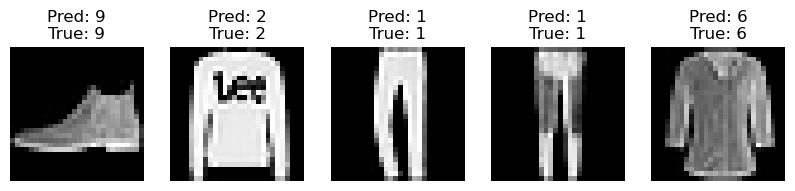

In [23]:
# Predict classes for the test set using the trained model

# Generate class predictions for each image in the test set
predictions = model.predict(x_test)

# Display a few test samples alongside their predicted and true labels for visual inspection

# Set up a figure with specified size to show 5 sample images
plt.figure(figsize=(10, 10))

# Loop through the first 5 images in the test set to display predictions
for i in range(5):
    # Create a subplot to arrange images in a 1x5 grid format
    plt.subplot(1, 5, i + 1)
    
    # Display each test image, reshaping from 784-dimensional vector back to 28x28 2D format
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    
    # Set the title to show the predicted label and the true label for each sample
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {y_test[i]}")
    
    # Turn off the axis for a cleaner display of each image
    plt.axis('off')

# Render the figure with the sample images, predicted, and true labels
plt.show()


- **We are using the trained model to make predictions on the test set and display some sample predictions along with the actual labels.**
- **This visual validation allows us to see the model’s performance on individual cases and observe any misclassifications.**
- **Thus, it can be seen that all the predictions of classes are correct corresponding to their fashion item**

## Building and Training a CNN with Data Augmentation for Improved Classification Accuracy on Fashion MNIST

### 1.Import Libraries

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report



### 2. Data Normalization

In [27]:
# Reshape x_train and x_test to 4D for grayscale images
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0


### 3. Data Augmentation

In [29]:
# Set up data augmentation parameters for the training dataset
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotate images randomly within 10 degrees
    width_shift_range=0.1,  # Shift images horizontally within 10% of width
    height_shift_range=0.1, # Shift images vertically within 10% of height
    zoom_range=0.1          # Randomly zoom in/out within 10% range
)

# Apply data augmentation to training set
datagen.fit(x_train)

- ***Data augmentation is applied to artificially expand the training dataset, improving generalization by creating slightly modified versions of each image (rotations, shifts, zooms).***
- ***This reduces overfitting, making the model more robust to variations in real-world data.***

### 4. Model Architecture

In [31]:
# Define the CNN model architecture
model = Sequential([
    # First convolutional layer with batch normalization
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    
    # Second convolutional layer with max pooling
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Dropout to reduce overfitting

    # Third convolutional layer with batch normalization and max pooling
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Dropout to reduce overfitting

    # Flatten layer to transform 2D matrix to 1D vector
    Flatten(),
    
    # Dense layer with batch normalization
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Dropout to reduce overfitting

    # Additional dense layer with batch normalization
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Dropout to reduce overfitting

    # Output layer for 10 classes
    Dense(10, activation='softmax')
])



C:\Users\taman\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**The CNN model is built in layers:**

- **Convolutional Layers:** Extract spatial features from images.
- **Batch Normalization:**  Stabilizes and accelerates training by normalizing activations within layers.
- **Max Pooling:**  Reduces dimensionality and computation, retaining important features.
- **Dropout Layers:**  Helps reduce overfitting by randomly deactivating some neurons during training.
- **Flatten Layer:**  Transforms the 2D matrix of features into a 1D vector, making it compatible with fully connected layers.
- **Dense Layers:**  Fully connected layers to learn complex patterns in the data.
- **Output Layer:**  Outputs a probability distribution across 10 classes.

### 5. Model Compilation

In [33]:
# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,                     # Optimizer
    loss='sparse_categorical_crossentropy',   # Loss function for multi-class classification
    metrics=['accuracy']                      # Metric to evaluate model performance
)



- ***The model is compiled with the Adam optimizer and a sparse categorical cross-entropy loss function, which is well-suited for multi-class classification problems.***
- ***The accuracy metric is chosen to track model performance.***

### 6. Callbacks

In [35]:
# Define early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',            # Monitors validation loss
    patience=10,                   # Stops training if no improvement for 10 epochs
    restore_best_weights=True      # Restores model weights from best epoch
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',            # Monitors validation loss
    factor=0.5,                    # Reduces learning rate by half if no improvement
    patience=5,                    # Waits for 5 epochs before reducing learning rate
    min_lr=1e-5                    # Sets minimum learning rate
)



- ***Early Stopping:*** Prevents overfitting by stopping training if the validation loss doesn’t improve after a specified patience period.
- ***Reduce Learning Rate:*** Dynamically reduces the learning rate when progress stalls, allowing the model to continue improving at a finer scale.

### 7. Model Training with Data Augmentation

In [37]:
history = model.fit(    datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/10


C:\Users\taman\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 72ms/step - accuracy: 0.5617 - loss: 1.2839 - val_accuracy: 0.7785 - val_loss: 0.5388 - learning_rate: 0.0010
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 75ms/step - accuracy: 0.7425 - loss: 0.6904 - val_accuracy: 0.8203 - val_loss: 0.4568 - learning_rate: 0.0010
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 72ms/step - accuracy: 0.7776 - loss: 0.5990 - val_accuracy: 0.8227 - val_loss: 0.4488 - learning_rate: 0.0010
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 70ms/step - accuracy: 0.8025 - loss: 0.5423 - val_accuracy: 0.8721 - val_loss: 0.3502 - learning_rate: 0.0010
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 71ms/step - accuracy: 0.8186 - loss: 0.5075 - val_accuracy: 0.8808 - val_loss: 0.3238 - learning_rate: 0.0010
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 71ms/step - accuracy: 0.8315 - loss: 0.4733 - val_accuracy: 0.8010 - val_loss: 0.5919 - learning_rate: 0.0010
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 71ms/step - accuracy: 0.8360 - loss: 0.4616

***The model is trained with the augmented training data for a maximum of 10 epochs. Validation data is used to monitor progress and adjust training through callbacks***

### 8. Model Evaluation

In [41]:
# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8908 - loss: 0.2984
Test Accuracy: 89.32%


***The CNN model outperforms the ANN, with accuracy improving from 87% to 89.32%. This suggests that CNNs are better for image classification, as they effectively capture spatial features, leading to better feature learning and generalization.***


### 9. Classification Report

In [44]:
# Generate predictions and print classification report
y_pred = model.predict(x_test).argmax(axis=1)  # Predict classes for test set
print(classification_report(y_test, y_pred))   # Classification report with precision, recall, f1-score


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.87      0.83      0.85      1000
           3       0.86      0.91      0.89      1000
           4       0.84      0.79      0.81      1000
           5       0.98      0.98      0.98      1000
           6       0.64      0.72      0.68      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



# INSIGHTS WITH CNN ARCHITECTURE:
The classification report reflects the performance of the CNN model on the Fashion MNIST dataset, following enhancements such as data augmentation and early stopping. Here’s an analysis of what these metrics indicate for each fashion item:

- ***High Performance in Certain Classes:***

**Classes like Trouser (1), Sandal (5), Sneaker (7), Bag (8), and Ankle Boot (9)** exhibit very high precision, recall, and F1 scores **(close to 1.0)**. These items are visually distinct, making them easier for the model to classify correctly. For example, trousers and sandals are generally unique in shape compared to other fashion items.

- ***Moderate Performance in Other Classes:***

**Classes such as T-shirt/top (0), Pullover (2), Dress (3), and Coat (4)** show slightly lower precision, recall, and F1 scores **(ranging from 0.81 to 0.89)**. This performance suggests the model may occasionally confuse these items due to their similar appearance (e.g., T-shirts and pullovers or dresses and coats).

                                                                                                                                           
- ***Lowest Performance in the ‘Shirt’ Class (6):***

The **Shirt (6)** class has the lowest precision, recall, and F1 score **(precision: 0.64, recall: 0.72)**. This lower performance likely results from visual similarities with other classes (e.g., T-shirts or pullovers), causing the model to misclassify shirts more often.

- ***Overall Accuracy and Consistency:***

The **overall accuracy of 0.89** shows that the model correctly classifies most images, with an overall strong balance between precision and recall across all classes.

**The macro average and weighted average values for precision are 0.90, while recall and F1-score are  0.89**, indicating consistent performance across most classes, though a few classes remain challenging.

















# COMPARISON BETWEEN PERFORMANCE OF ANN AND CNN:

# **Detailed Comparison of ANN and CNN Performance with F1-Score Insights**

## **Class 0 - T-shirt/top:**

### **ANN:**
- **Precision (0.83):** 83% of items classified as T-shirts/tops are correct, with 17% being false positives.
- **Recall (0.86):** 86% of all T-shirts/tops in the dataset are correctly identified, with 14% missed as false negatives.
- **F1-score (0.84):** Indicates a balanced performance between precision and recall, though there is room for improvement in reducing false positives and negatives.

### **CNN:**
- **Precision (0.88):** Higher precision than ANN, indicating fewer false positives.
- **Recall (0.80):** Lower recall compared to ANN, leading to more missed T-shirts/tops.
- **F1-score (0.84):** Same as ANN, meaning that although CNN has fewer false positives, it has slightly more false negatives.

---

## **Class 1 - Trouser:**

### **ANN:**
- **Precision (0.98):** Very high precision with minimal false positives.
- **Recall (0.97):** 97% of all trousers are correctly identified.
- **F1-score (0.98):** Strong performance, with balanced precision and recall.

### **CNN:**
- **Precision (0.99):** Even fewer false positives than ANN.
- **Recall (0.98):** Slightly higher recall than ANN, reducing missed trousers.
- **F1-score (0.99):** Close to perfect, indicating the CNN's superior performance in identifying trousers accurately.

---

## **Class 2 - Pullover:**

### **ANN:**
- **Precision (0.81):** 81% precision, with 19% of items incorrectly classified as pullovers.
- **Recall (0.76):** Misses 24% of actual pullovers.
- **F1-score (0.78):** Indicates a moderate trade-off between precision and recall, suggesting the model could improve in capturing pullovers more accurately.

### **CNN:**
- **Precision (0.87):** Higher precision, meaning fewer items are misclassified as pullovers.
- **Recall (0.83):** Higher recall compared to ANN, capturing more pullovers.
- **F1-score (0.85):** Better balanced than ANN, showing CNN's superior capability in identifying pullovers.

---

## **Class 3 - Dress:**

### **ANN:**
- **Precision (0.92):** High precision with 8% false positives.
- **Recall (0.84):** 84% of dresses are correctly classified.
- **F1-score (0.88):** Strong balance but slightly impacted by missed dresses.

### **CNN:**
- **Precision (0.86):** Slightly lower precision with more false positives.
- **Recall (0.91):** Higher recall, capturing more dresses.
- **F1-score (0.88):** Similar to ANN, reflecting a balanced approach in dress classification.

---

## **Class 4 - Coat:**

### **ANN:**
- **Precision (0.72):** Only 72% precision, with a significant portion of false positives.
- **Recall (0.89):** High recall indicates most coats are captured.
- **F1-score (0.80):** Moderate performance, suggesting the need for improvement in precision.

### **CNN:**
- **Precision (0.84):** Higher precision than ANN, reducing false positives.
- **Recall (0.79):** Lower recall, missing more coats.
- **F1-score (0.81):** Similar to ANN, with CNN showing better precision but slightly less recall.

---

## **Class 5 - Sandal:**

### **ANN:**
- **Precision (0.97):** Very high precision, with minimal false positives.
- **Recall (0.96):** High recall, capturing most sandals.
- **F1-score (0.96):** Strong performance, demonstrating a balanced classification for sandals.

### **CNN:**
- **Precision (0.98):** Slightly higher precision, indicating fewer false positives.
- **Recall (0.98):** Even higher recall, capturing nearly all sandals.
- **F1-score (0.98):** Reflects CNN's superior accuracy and reliability for sandal classification.

---

## **Class 6 - Shirt:**

### **ANN:**
- **Precision (0.73):** Moderate precision, with 27% false positives.
- **Recall (0.64):** Low recall, missing 36% of shirts.
- **F1-score (0.68):** Indicates room for improvement in both precision and recall.

### **CNN:**
- **Precision (0.64):** Lower precision than ANN, with more items misclassified as shirts.
- **Recall (0.72):** Higher recall than ANN, missing fewer actual shirts.
- **F1-score (0.68):** Same as ANN, but CNN has a better balance between fewer missed shirts and more false positives.

---

## **Class 7 - Sneaker:**

### **ANN:**
- **Precision (0.95):** High precision, indicating minimal false positives.
- **Recall (0.92):** High recall, capturing most sneakers.
- **F1-score (0.94):** Shows balanced performance with minimal misclassifications.

### **CNN:**
- **Precision (0.95):** Same precision as ANN.
- **Recall (0.97):** Higher recall than ANN, capturing more sneakers.
- **F1-score (0.96):** Slightly higher than ANN, showing CNN's effectiveness in sneaker classification.

---

## **Class 8 - Bag:**

### **ANN:**
- **Precision (0.96):** High precision, with only 4% false positives.
- **Recall (0.97):** Captures 97% of all bags.
- **F1-score (0.96):** Balanced performance, showing accurate bag classification.

### **CNN:**
- **Precision (0.98):** Higher precision, with fewer false positives.
- **Recall (0.99):** Very high recall, capturing almost all bags.
- **F1-score (0.98):** Reflects CNN’s superior performance in bag classification.

---

## **Class 9 - Ankle boot:**

### **ANN:**
- **Precision (0.93):** High precision, with 7% false positives.
- **Recall (0.97):** High recall, capturing most ankle boots.
- **F1-score (0.95):** Balanced performance, though slightly impacted by false positives.

### **CNN:**
- **Precision (0.98):** Higher precision than ANN, with fewer false positives.
- **Recall (0.95):** Se that **CNN handles complex classification tasks slightly better than ANN**, with fewer misclassifications and missed items across most classes.
r recall, with 5% false negatives, meaning a few more missed ankle boots compared to ANN.


## OVERALL COMPARISON:
- **Accuracy:** CNN provides better accuracy than ANN (89% vs. 87%).

- **Precision, Recall, F1-Score:** CNN outperforms ANN in all these metrics, indicating superior overall performance, especially in achieving a balance between precision and recall.

- **Class-wise performance:** Both models perform similarly on some classes, but CNN consistently provides higher precision and recall across most classes, particularly for harder-to-classify classes like Class 6 (Shirt).

- **General Insights:**
1. CNN is better at handling image data and capturing spatial features, making it the more suitable architecture for image classification tasks.
2. The ANN, while effective, shows limitations in precision and recall for certain classes (like Class 6), likely due to the absence of convolutional layers that capture spatial dependencies in the data.

**In conclusion, CNN is the preferred model for Fashion MNIST classification, offering superior accuracy, precision, recall, and F1-Score across most metrics, showcasing its advantages for image classification tasks.**

# CONCLUSION:

- **The CNN with data augmentation and early stopping outperforms the ANN in terms of all key metrics, including accuracy, precision, recall, and F1-score.**
-  **The use of data augmentation and early stopping helped improve the generalization and accuracy of the CNN model.**
